[View in Colaboratory](https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/4.4_ransac_regression.ipynb)

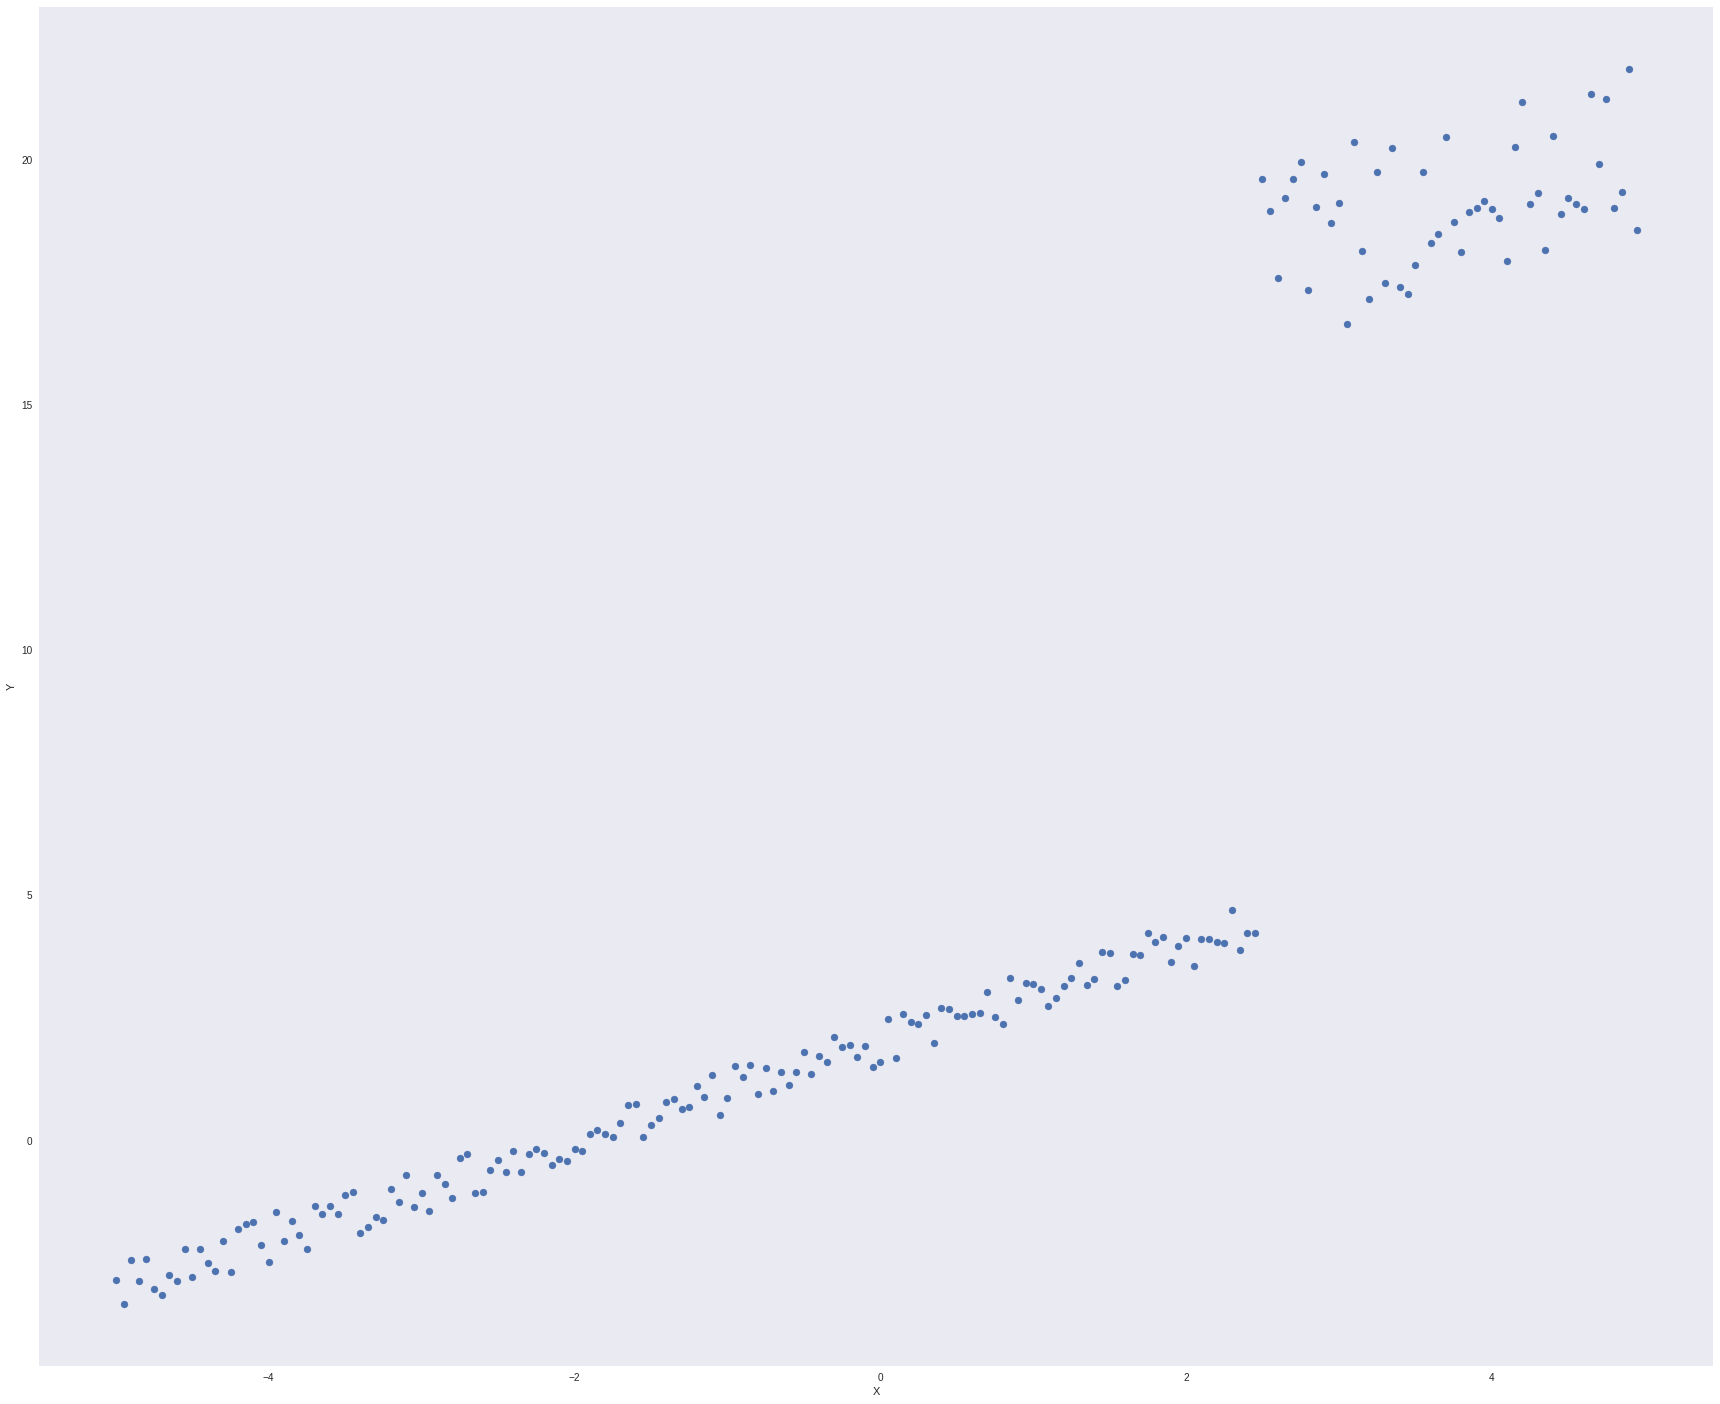

Standard regressor: y = 2.496x + 5.369
RANSAC regressor: y = 1.003x + 1.998


In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RANSACRegressor


# 재현성을 위한 시드 설정
np.random.seed(1000)

nb_samples = 200
nb_noise_samples = 150


def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()

    plt.show()


if __name__ == '__main__':
    # 데이터셋 생성
    X = np.arange(-5, 5, 0.05)

    Y = X + 2
    Y += np.random.uniform(-0.5, 0.5, size=nb_samples)

    for i in range(nb_noise_samples, nb_samples):
        Y[i] += np.random.uniform(12, 15)

    # 데이터셋 가시화
    show_dataset(X, Y)

    # 선형회귀 
    lr = LinearRegression(normalize=True)
    lr.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    print('Standard regressor: y = %.3fx + %.3f' % (lr.coef_, lr.intercept_))

    # 랜색분석-RANSAC
    rs = RANSACRegressor(lr)
    rs.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    print('RANSAC regressor: y = %.3fx + %.3f' % (rs.estimator_.coef_, rs.estimator_.intercept_))